Bank has a growing customer base. the bankwants to increase borrowers(asset customers) base to bring in more loan business and earnmore through the interest on loans. So, bank wants to convert the liability customers.(while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success.

**ON DATASET**
The file contains data on 5000 customers. The data include customer demographic information(age,income,etc.), the customer's relationship with bank(mortage,securities account,etc.), and customer response to the last personal loan campaign(Personal Loan)

setting working directory and importing data file

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
sns.set(style="ticks")

from scipy.stats import zscore
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection










In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Bank_Personal_Loan_Modelling 1.xlsx to Bank_Personal_Loan_Modelling 1.xlsx


In [ ]:
import io
dataset = pd.read_excel(io.BytesIO(uploaded['Bank_Personal_Loan_Modelling 1.xlsx']))

In [ ]:
dataset.head(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
dataset.tail(5)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [ ]:
dataset.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

INFORMATION ON THE FEATURES OR ATTRIBUTES

The attributes can be divided accordingly:

*  the variable ID does not add any interesting information. There is no association between a person's customer ID and loanm, also does not provide any general conclusion for future potential loan customers.

The binary category have five variables as below:

*  Personal loan-Did the customer accept the personal loan **This is the target variable**
*  Securities Account-Does the customer has a security account with the bank
*  CD Account-Does the customer have a securities account with the bank
*  Online-Does the customer have a certificate of deposit account with the bank.
*  Credit Card-Does the customer use a credit caer issued by UniversalBank

Interval variables are as below:

*  Age
*  Experience
*  Income
*  CCAvg
*  Mortage

Ordinal Categorial Variables:

*  Family
*  Education

Nominal variable:

*  ID
*  Zip Code


In [ ]:
dataset.shape

(5000, 14)

 Checking the types of data and basic summary stats

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [ ]:
dataset.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
dataset.apply(lambda x : sum(x.isnull()))

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [ ]:
dataset.apply(lambda x: len(x.unique()))

ID                    5000
Age                     45
Experience              47
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

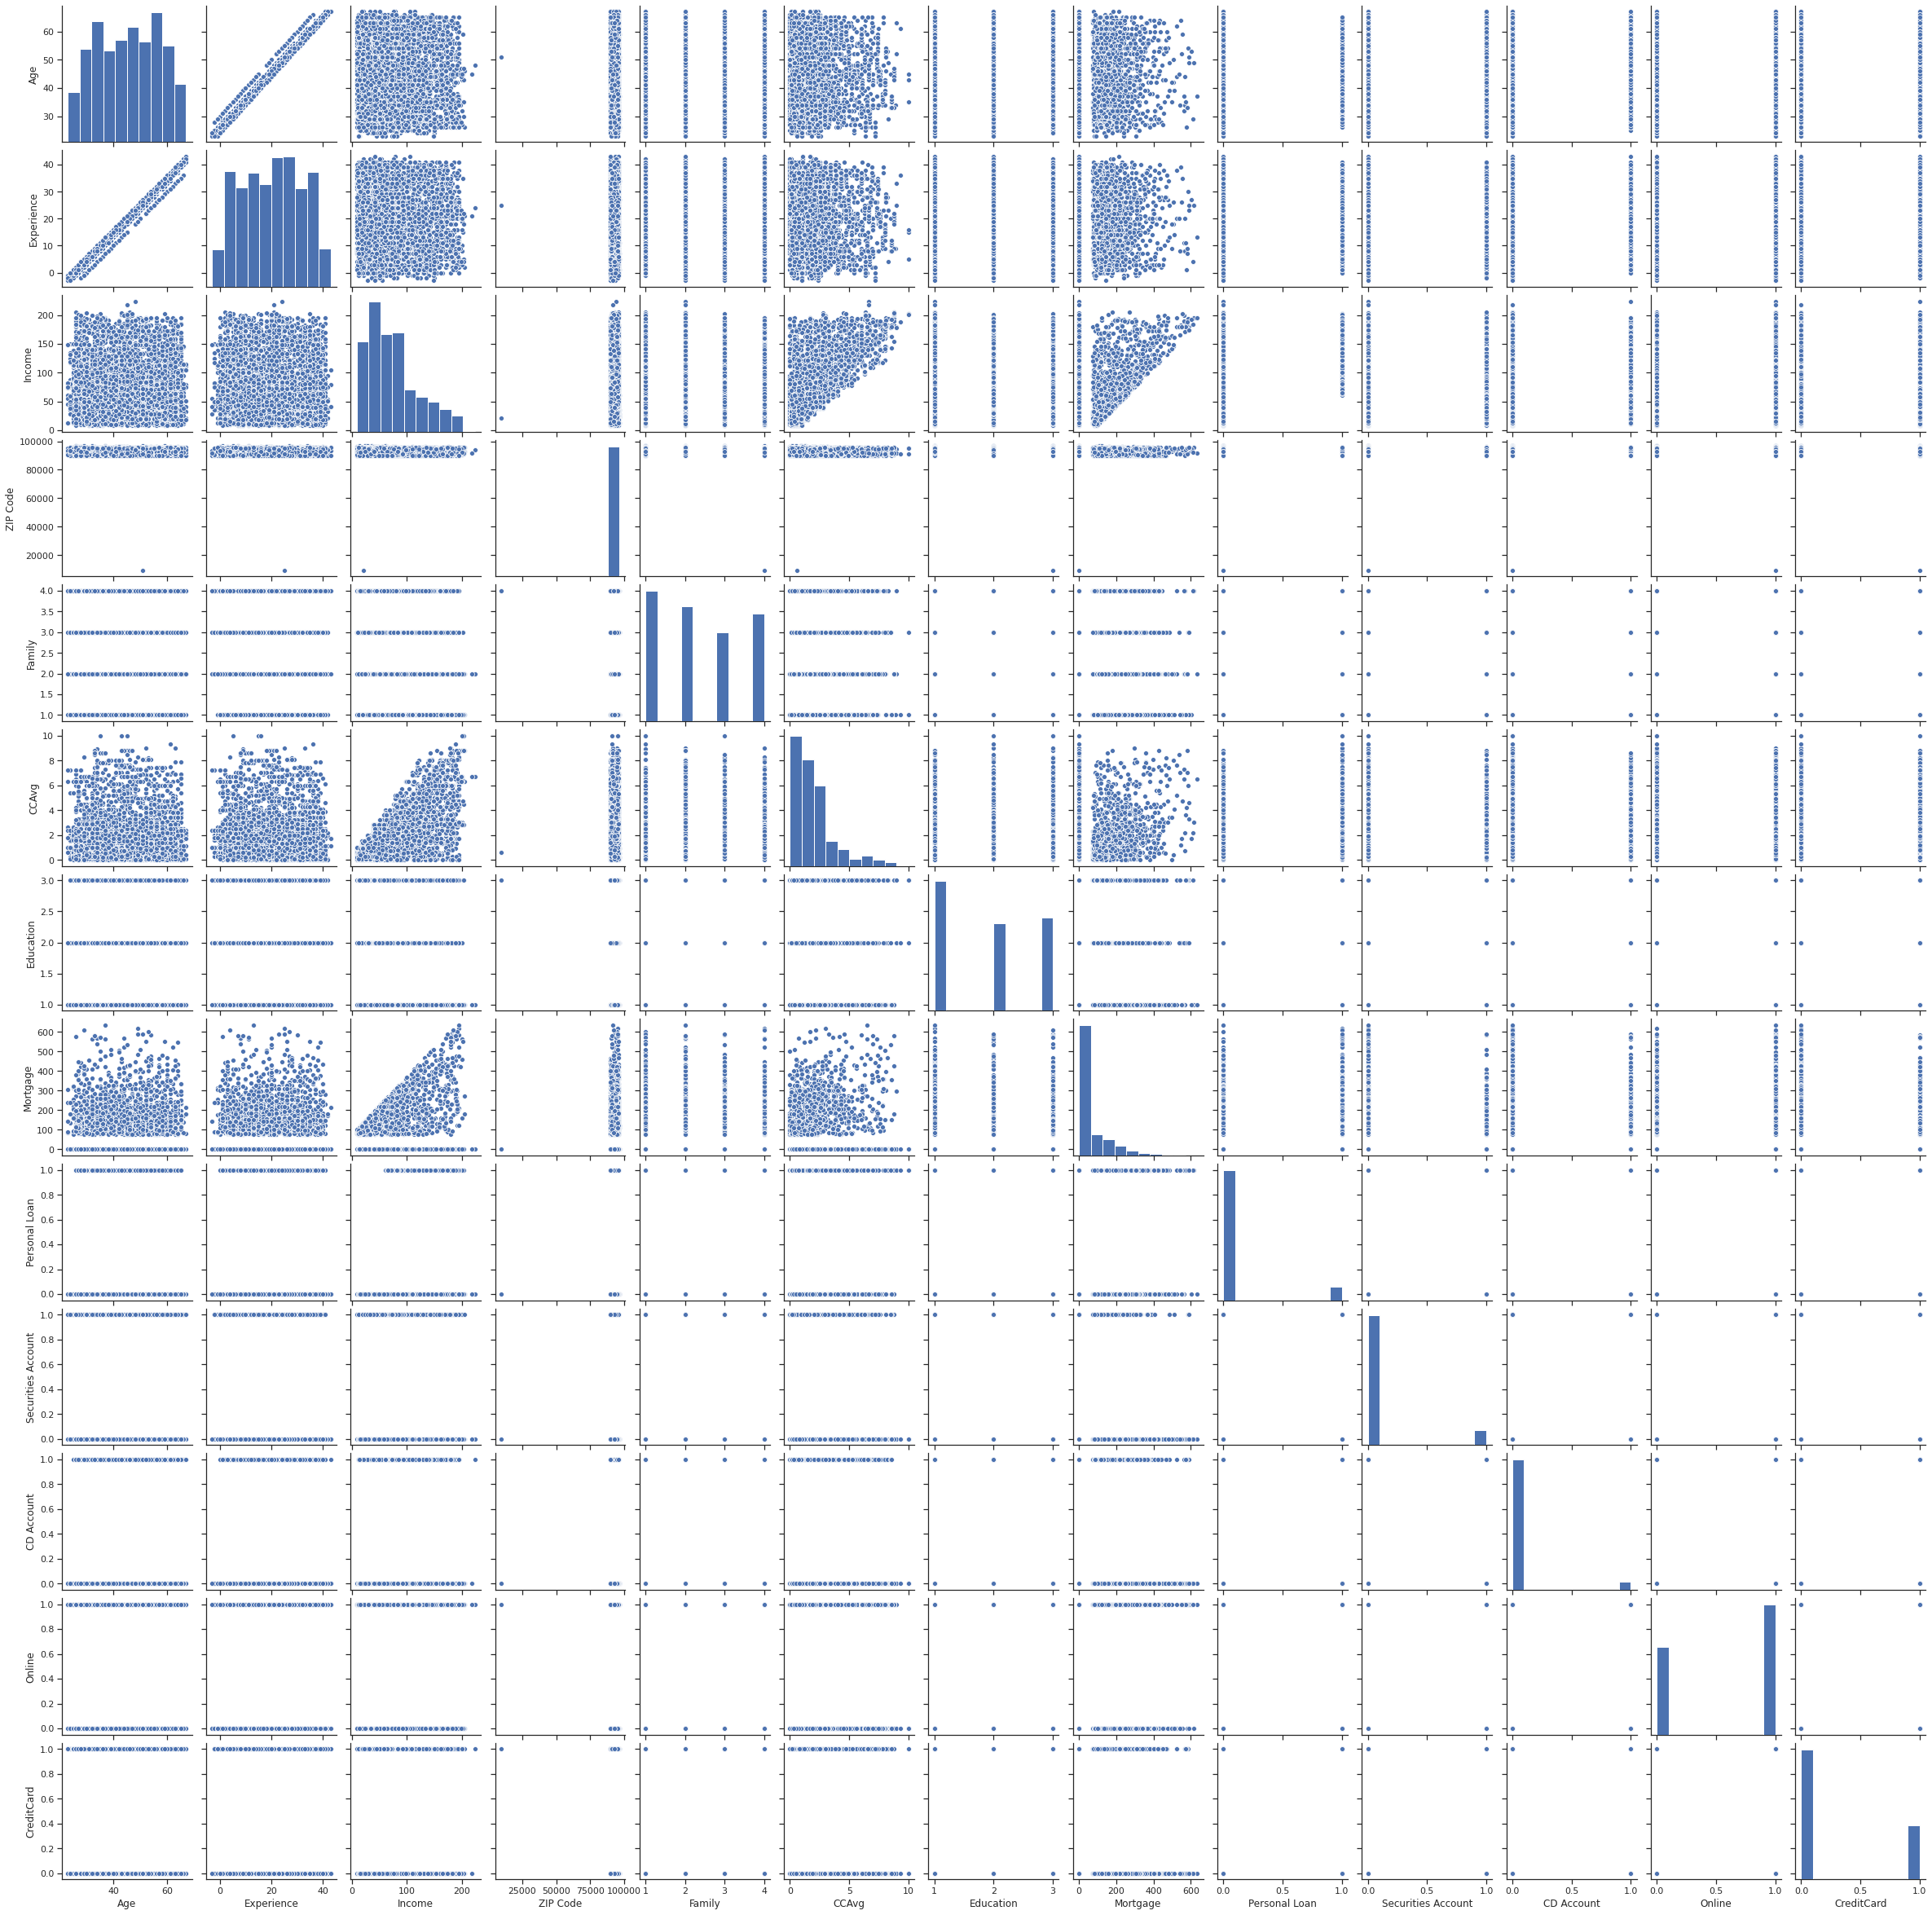

In [ ]:
sns.pairplot(dataset.iloc[:,1:])

* Age is normally distributed with majority of customers falling between 30 years and 60 years of age.it can be confirmed that the mean is almost equal to median.

* Experience is normally distributed with more customer having experience starting from 8 years. here mean is equal to median. There are negative values in the experience, it cannot be measured and these values can be deleted.

* Income is positively skewed. Majority of customers have income between 45k and 55k. it can be confirmed that the mean is greater than median.

* CCAvg is positively skewed variable. Average spending is between 0 to 10k and majority spends less than 2.5k.

* Mortage 70% of individuals have a mortage of less than 40k.

* The varible family and education are ordinal variables.



In [ ]:
dataset[dataset['Experience']>0]
negExp = dataset.Experience < 0
column_name = 'Experience'
mylist = dataset.loc[negExp]['ID'].tolist()

In [ ]:
dataset[dataset['Experience'] < 0]['Experience'].count()

52

There are 52 records with negative experience

In [ ]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [ ]:
def categorize(df):
  for id in mylist:
    age = dataset.loc[np.where(dataset['ID']==id)]["Age"].tolist()[0]
    education = dataset.loc[np.where(dataset['ID']==id)]["Education"].tolist()[0]
    df_filtered = dfExperience[(dfExp.Age == age) & (dfExp.Education == education)]
    exp = df_filtered['Experience'].median()
    dataset.loc[dataset.loc[np.where(data['ID']==id)].index, 'Experience'] = exp

In [ ]:
(dataset.Mortgage == 0).sum()

3462

In [ ]:
(dataset.CCAvg == 0).sum()

106

In [ ]:
dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [ ]:
dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [ ]:
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [ ]:
dataset['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [ ]:
dataset.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [ ]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


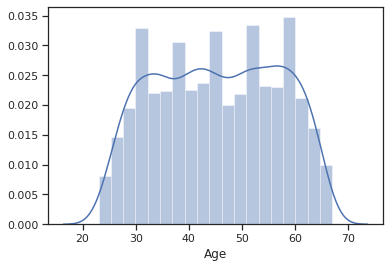

In [ ]:
sns.distplot(dataset.Age);

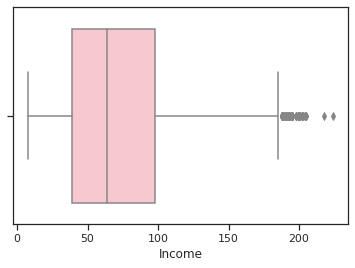

In [ ]:
sns.boxplot(dataset.Income, color = 'pink');

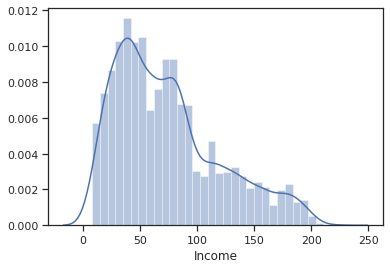

In [ ]:
sns.distplot(dataset.Income);

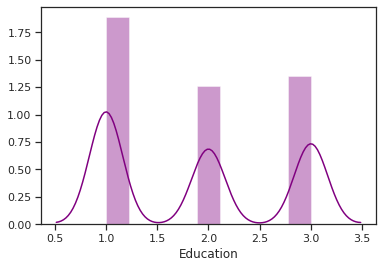

In [ ]:
sns.distplot(dataset.Education , color ='purple');

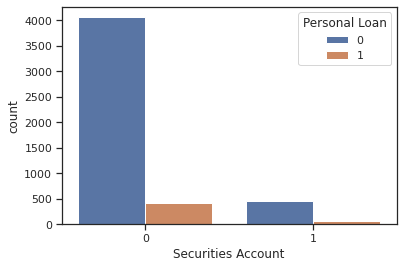

In [ ]:
sns.countplot(x="Securities Account", data=dataset, hue="Personal Loan");

observation 
*  majority of customers does not have securities account

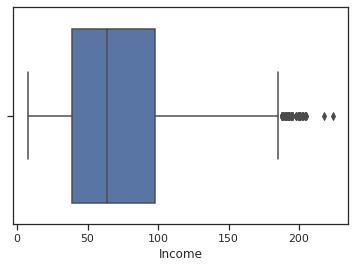

In [ ]:
sns.boxplot(x="Income",hue="Personal Loan",data=dataset);

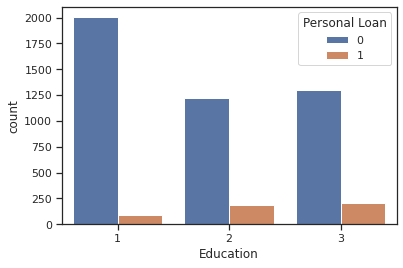

In [ ]:
sns.countplot(x="Education", hue="Personal Loan" , data=dataset);

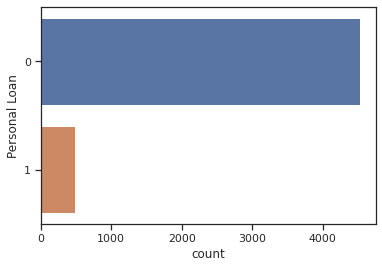

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y="Personal Loan", data=dataset)

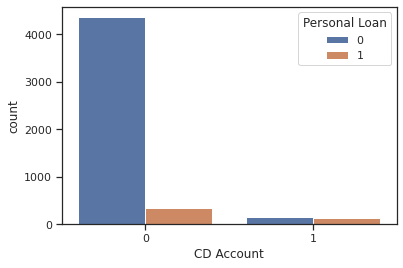

In [ ]:
sns.set(style="ticks", color_codes=True)
sns.countplot(x="CD Account" , data=dataset,hue="Personal Loan");

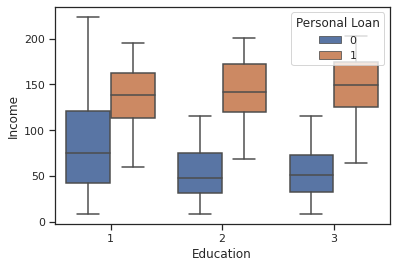

In [ ]:
sns.set(style="ticks" , color_codes=True)
sns.boxplot(x="Education",y="Income",hue="Personal Loan", data=dataset)

Observation

*  customers having education level 1 is having high income.
*  customers with personal loan have same income levels.

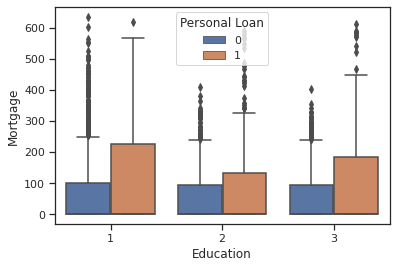

In [ ]:
sns.set(style="ticks" , color_codes=True)
sns.boxplot(x="Education",y="Mortgage",data=dataset,hue="Personal Loan")

Observation

*  from the chart it seems that the customer with no personal loan and with personal loan have high mortage

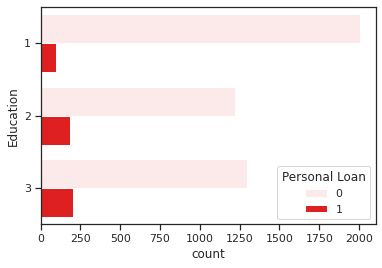

In [ ]:
sns.countplot( y="Education"  ,hue ="Personal Loan" ,data=dataset, color='red');


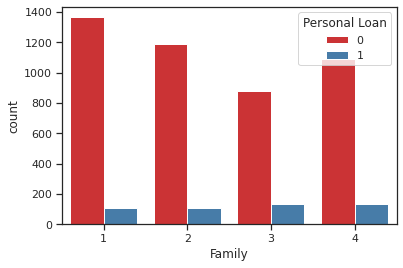

In [ ]:
sns.countplot(x="Family",data=dataset,hue="Personal Loan" ,palette ='Set1');

observation
*  family size does not have any impact in personal loan. But families with size 3 are most likely to take loan

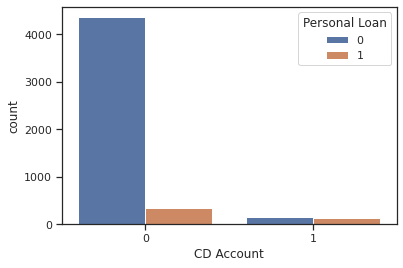

In [ ]:
sns.countplot(x="CD Account", data=dataset ,hue="Personal Loan");

customers whodoes not have CD Account, does not have loan as well. This seems to be majority.But customers with CD Account have loan as well.

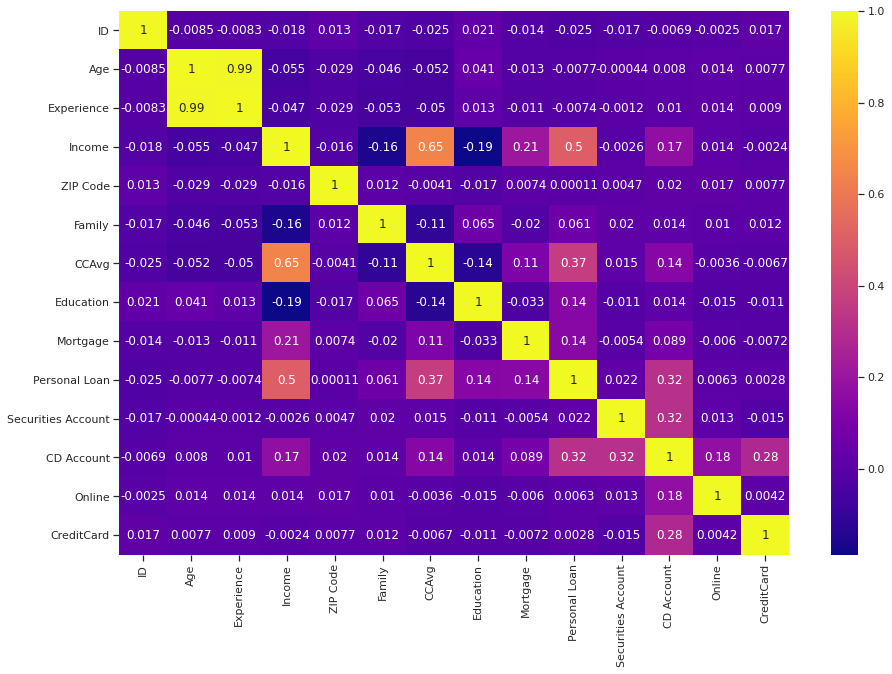

In [ ]:
fig,ax = plt.subplots(figsize=(15,10))
sns.heatmap(dataset.corr(),cmap='plasma', annot=True);


Text(0, 0.5, 'Age')

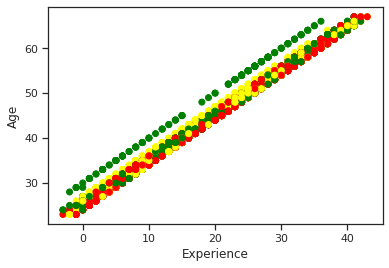

In [ ]:
fig,ax = plt.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(dataset["Experience"],dataset["Age"],c=dataset["Education"].apply(lambda x:colors[x]))
plt.xlabel("Experience")
plt.ylabel("Age")

Observation

* The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also colors show the education level.More people are in under graduate level.

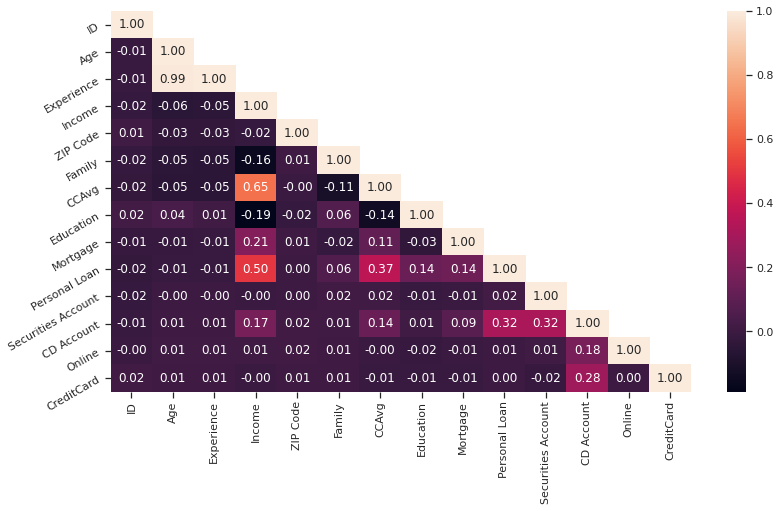

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = dataset.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth":2.5})
plt.figure(figsize=(13,7))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot= True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

Observation
* income and CCAvg are moderately correlated.
* age and experience are highly correlated

APPLYING MODELS

Split data into train and test

In [ ]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(dataset.drop(['ID','Experience'], axis=1),test_size=0.3 , random_state=100)

In [ ]:
train_labels = train_set = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

DECISION TREE CLASSIFIER

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)



In [ ]:
dt_model.fit(test_set , test_labels)
dt_model.score(test_set , test_labels)

0.9813333333333333

In [ ]:
y_predict = dt_model.predict(test_set)
y_predict[:5]

array([0, 0, 0, 0, 0])

In [ ]:
test_set.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
789,29,31,92126,4,0.3,2,0,0,0,1,0
2507,59,60,90048,4,2.1,1,234,0,0,1,1
2376,58,23,91768,3,0.2,1,0,0,0,0,0
1378,54,34,93305,4,0.1,3,0,0,0,1,0
598,56,11,92374,2,0.2,3,90,0,0,0,0


NAIVE BAYES

In [ ]:
naive_model = GaussianNB()
naive_model.fit(test_set, test_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)


0.8913333333333333

LOGISTIC REGRESSION
* Import packages

In [ ]:
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

* Get data

In [ ]:

x,y = load_digits(return_X_y=True)

*  Split data

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=100)

*  Scale data

  **standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

* creating model 

In [ ]:
model = LogisticRegression(solver='liblinear', multi_class='ovr', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

*  evaluating model

In [ ]:
x_test = scaler.transform(x_test)

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
model.score(x_train, y_train)*100


98.64757358790771

In [ ]:
model.score(x_test, y_test)*100

95.55555555555556

In [ ]:
confusion_matrix(y_test,y_pred)

array([[59,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 48,  1,  0,  0,  0,  0,  0,  1,  0],
       [ 1,  2, 57,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 47,  0,  1,  0,  1,  0,  0],
       [ 0,  1,  0,  0, 55,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  0, 53,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 57,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 48,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  1,  1, 44,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  2,  2, 48]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        59
           1       0.92      0.96      0.94        50
           2       0.98      0.95      0.97        60
           3       0.96      0.96      0.96        49
           4       1.00      0.93      0.96        59
           5       0.96      0.98      0.97        54
           6       0.97      0.98      0.97        58
           7       0.92      0.96      0.94        50
           8       0.88      0.92      0.90        48
           9       0.96      0.91      0.93        53

    accuracy                           0.96       540
   macro avg       0.95      0.95      0.95       540
weighted avg       0.96      0.96      0.96       540



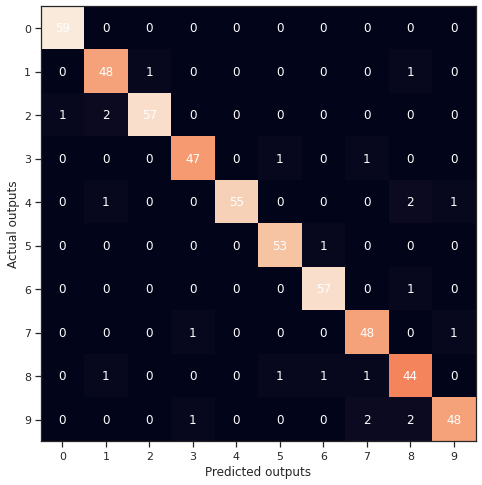

In [ ]:
cm =confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs')
ax.set_ylabel('Actual outputs')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
  for j in range(10):
   ax.text(j, i, cm[i,j], ha='center', va='center', color='white')

plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
models = []
models.append(('LR', LogisticRegression()))


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(test_set,test_set)
accuracy = regressor.score(test_set,test_set)
print(accuracy*100,'%')

100.0 %


/usr/local/lib/python3.6/dist-packages/sklearn/base.py:434: FutureWarning: The default value of multioutput (not exposed in score method) will change from 'variance_weighted' to 'uniform_average' in 0.23 to keep consistent with 'metrics.r2_score'. To specify the default value manually and avoid the warning, please either call 'metrics.r2_score' directly or make a custom scorer with 'metrics.make_scorer' (the built-in scorer 'r2' uses multioutput='uniform_average').
  "multioutput='uniform_average').", FutureWarning)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
x = np.arange(10).reshape(-1,1)
y = np.array([0,0,0,0,1,1,1,1,1,1])
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [ ]:
model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
model.score(x,y)

0.9

In [ ]:

from sklearn.ensemble import RandomForestClassifier
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(x_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

KNN(K-Nearest Neighbour)

In [ ]:
train_set_indep = dataset.drop(['Experience','ID'], axis=1).drop(labels= "Personal Loan", axis=1)
train_set_dep = dataset["Personal Loan"]
x = np.array(train_set_indep)
y = np.array(train_set_dep)
x_train = x[:3500, :]
x_test = x[3501: , :]
y_train = y[ :3500 , ]
y_test = y[3501:,]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=21 , weights ='uniform' , metric='euclidean')
knn.fit(x_train, y_train)
predicted = knn.predict(x_test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, predicted)
print(acc)

0.9106070713809206


MODEL COMPARISON

In [ ]:
models = []
models.append(('LR' , LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))


results = []
names = []
scoring = 'accuracy'
for  name, model in models:
  kfold = model_selection.KFold(n_splits= 10, random_state=12345)
  cv_results = model_selection.cross_val_score(model, x, y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "{}: {}". format(name, cv_results.mean(), cv_results.std())
  print(msg)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.9120000000000001


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.8986000000000001
CART: 0.9825999999999999
NB: 0.8855999999999999


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.9868000000000002


<function matplotlib.pyplot.show>

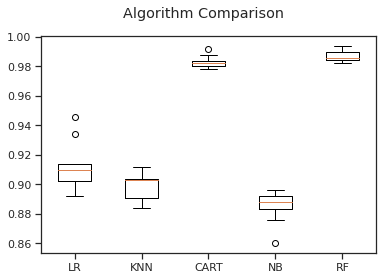

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show

CONCLUSION

  The aim o fthe universal bank is to convert their liability customers. They want to set up a new marketing campaign, hence they need information about the connection between the variables given in the data. 
  Five classification algorithms were used in this study. From graph it can be concluded that the Decision Tree algorithm have highest accuracy so that can be chosen as the final model